<a href="https://colab.research.google.com/github/srilalithaveerubhotla/Clustering_on_MNIST/blob/master/kmeansclustering_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This is on high level.code corrections need to be done 

In [0]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import numpy as np
import pandas as pd
np.random.seed(42)
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import fcluster
#import fastcluster
from scipy.cluster.hierarchy import dendrogram, cophenet,linkage
from scipy.spatial.distance import pdist
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE 

In [0]:
digits = load_digits()
type(digits.data)

numpy.ndarray

In [0]:
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

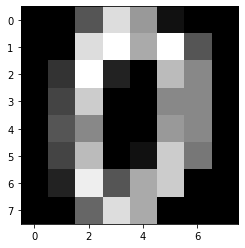

In [0]:
plt.gray()
plt.imshow(digits.images[0])
plt.show() 

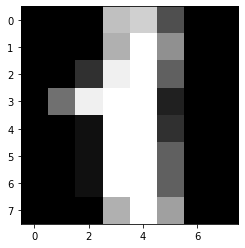

In [0]:
plt.gray()
plt.imshow(digits.images[1])
plt.show() 

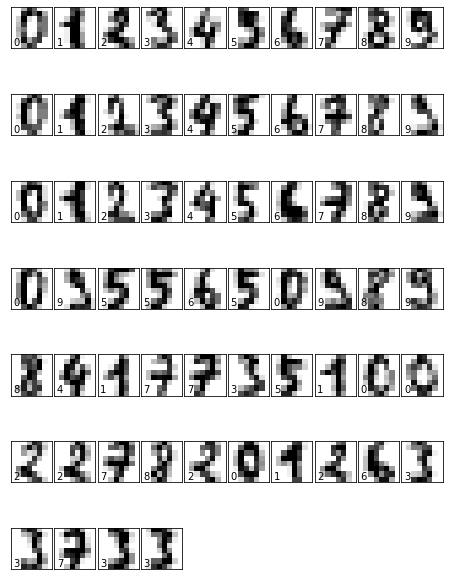

In [0]:
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=2, top=4,hspace=0.05, wspace=0.05)
for i in range(64):
    image = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    image.imshow(digits.images[i], cmap=plt.cm.binary,interpolation='nearest')
    # label the image with the target value
    image.text(0, 7, str(digits.target[i]))

In [0]:
data=scale(digits.data)

#This code doesnt scaled data also doesnt convered into pixels of numpys so the error is high

In [0]:
n_clusters=10
random_state=0
kmeans_clustering = KMeans(n_clusters=n_clusters,random_state=random_state)
kmeans_clusters=kmeans_clustering.fit_predict(digits.data)

In [0]:
kmeans_clusters

array([5, 9, 9, ..., 9, 4, 4], dtype=int32)

In [0]:
kmeans_clustering.cluster_centers_.shape

(10, 64)

In [0]:
n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))

In [0]:
print("n_digits: %d" % n_digits)
print("n_features: %d" % n_features)
print("n_samples: %d" % n_samples)

n_digits: 10
n_features: 64
n_samples: 1797


In [0]:

sum_of_squared_distances = []
K = range(0,3)
for k in K:
    k_means = KMeans(n_clusters=10,n_init=10,max_iter=max_iter,n_jobs=n_jobs,tol=tol)
    model = k_means.fit(data)
    sum_of_squared_distances.append(k_means.inertia_)
    print(sum_of_squared_distances)

[69513.8399514696]
[69513.8399514696, 69693.15195295503]
[69513.8399514696, 69693.15195295503, 69492.65745638903]


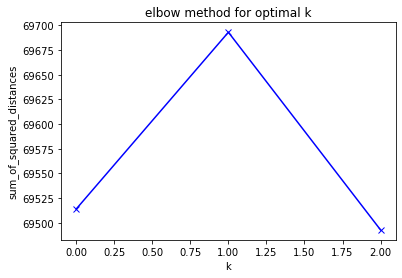

In [0]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

In [0]:
X_digits, y_digits = load_digits(return_X_y=True)
data = scale(X_digits)

n_samples, n_features = data.shape
n_digits = len(np.unique(y_digits))
labels = y_digits

sample_size = 300

print(n_digits, n_samples, n_features)

10 1797 64


In [0]:
reduced_data = PCA(n_components=2).fit_transform(data)

sum_of_squared_distances = []
K = range(2,15)
for k in K:
  kmeans = KMeans(n_clusters=n_digits,random_state=2)
  kmeans.fit(reduced_data)
  sum_of_squared_distances.append(kmeans.inertia_)
  print(sum_of_squared_distances)

[2816.6900213510644]
[2816.6900213510644, 2816.6900213510644]
[2816.6900213510644, 2816.6900213510644, 2816.6900213510644]
[2816.6900213510644, 2816.6900213510644, 2816.6900213510644, 2816.6900213510644]
[2816.6900213510644, 2816.6900213510644, 2816.6900213510644, 2816.6900213510644, 2816.6900213510644]
[2816.6900213510644, 2816.6900213510644, 2816.6900213510644, 2816.6900213510644, 2816.6900213510644, 2816.6900213510644]
[2816.6900213510644, 2816.6900213510644, 2816.6900213510644, 2816.6900213510644, 2816.6900213510644, 2816.6900213510644, 2816.6900213510644]
[2816.6900213510644, 2816.6900213510644, 2816.6900213510644, 2816.6900213510644, 2816.6900213510644, 2816.6900213510644, 2816.6900213510644, 2816.6900213510644]
[2816.6900213510644, 2816.6900213510644, 2816.6900213510644, 2816.6900213510644, 2816.6900213510644, 2816.6900213510644, 2816.6900213510644, 2816.6900213510644, 2816.6900213510644]
[2816.6900213510644, 2816.6900213510644, 2816.6900213510644, 2816.6900213510644, 2816.69002

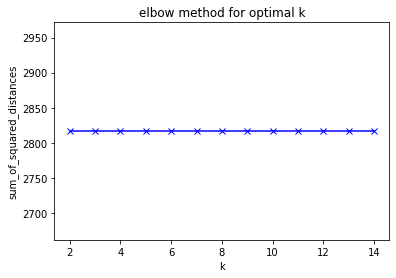

In [0]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

# This code is nicely scaled up and converted into dataframe we used elbow for finding right cluster number

In [0]:
df=pd.DataFrame() 
for i in range(64): 
    df[f"Pixel{i}"]=digits.data[:,i]

In [0]:
df

,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,Pixel10,Pixel11,Pixel12,Pixel13,Pixel14,Pixel15,Pixel16,Pixel17,Pixel18,Pixel19,Pixel20,Pixel21,Pixel22,Pixel23,Pixel24,Pixel25,Pixel26,Pixel27,Pixel28,Pixel29,Pixel30,Pixel31,Pixel32,Pixel33,Pixel34,Pixel35,Pixel36,Pixel37,Pixel38,Pixel39,Pixel40,Pixel41,Pixel42,Pixel43,Pixel44,Pixel45,Pixel46,Pixel47,Pixel48,Pixel49,Pixel50,Pixel51,Pixel52,Pixel53,Pixel54,Pixel55,Pixel56,Pixel57,Pixel58,Pixel59,Pixel60,Pixel61,Pixel62,Pixel63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,16.0,14.0,12.0,16.0,3.0,0.0,0.0,4.0,16.0,6.0,3.0,16.0,4.0,0.0,0.0,0.0,12.0,16.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,4.0,4.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,5.0,0.0,0.0,0.0,5.0,7.0,7.0,16.0,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,16.0,15.0,12.0,16.0,1.0,0.0,0.0,3.0,16.0,7.0,0.0,13.0,6.0,0.0,0.0,4.0,16.0,0.0,0.0,10.0,8.0,0.0,0.0,8.0,16.0,0.0,0.0,14.0,6.0,0.0,0.0,5.0,16.0,7.0,9.0,16.0,5.0,0.0,0.0,1.0,15.0,16.0,16.0,16.0,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,13.0,16.0,8.0,2.0,1.0,0.0,0.0,0.0,16.0,15.0,10.0,16.0,5.0,0.0,0.0,0.0,8.0,16.0,16.0,7.0,0.0,0.0,0.0,0.0,9.0,16.0,16.0,4.0,0.0,0.0,0.0,0.0,16.0,14.0,16.0,15.0,0.0,0.0,0.0,0.0,15.0,15.0,15.0,16.0,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,14.0,16.0,16.0,15.0,1.0,0.0,0.0,4.0,16.0,7.0,3.0,16.0,7.0,0.0,0.0,5.0,16.0,10.0,7.0,16.0,4.0,0.0,0.0,0.0,5.0,14.0,14.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2.0,0.0,0.0,0.0,4.0,7.0,7.0,16.0,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [0]:
from sklearn.preprocessing import MinMaxScaler 
scaler=MinMaxScaler() 
df_scaled=scaler.fit_transform(df)

In [0]:
elbow={"inertia":[],"clusters":[]}
for i in range(2,15): 
    model=KMeans(i) 
    elbow["clusters"].append(i) 
    model.fit(df_scaled) 
    elbow["inertia"].append(model.inertia_)

Text(0.5, 1.0, 'Elbow Graph')

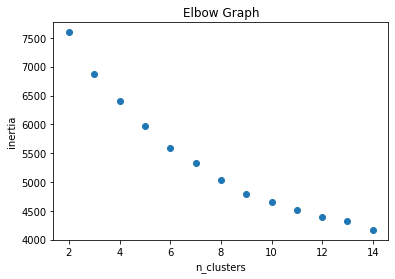

In [0]:
plt.scatter(x=elbow["clusters"],y=elbow["inertia"]) 
plt.xlabel("n_clusters") 
plt.ylabel("inertia") 
plt.title("Elbow Graph")

In [0]:
model_10=KMeans(10) 
model_10.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
tsne=TSNE(2) 
arr=tsne.fit_transform(df_scaled)

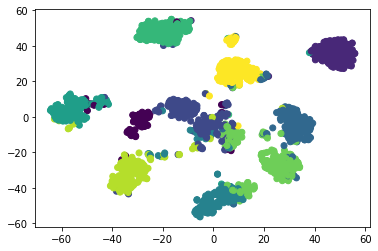

In [0]:
plt.scatter(arr[:,0],arr[:,1],c=model_10.labels_)

#Hierarchial clustering starts here

In [0]:
Z = fastcluster.linkage_vector(df_scaled, method='ward', metric='euclidean')
Z_dataFrame = pd.DataFrame(data=Z,columns=['clusterOne','clusterTwo','distance','newClusterSize'])

In [0]:
Z_dataFrame.iloc[:20]

,clusterOne,clusterTwo,distance,newClusterSize
0,1585.0,1648.0,0.330719,2.0
1,1247.0,1250.0,0.471865,2.0
2,777.0,1237.0,0.496078,2.0
3,1076.0,1134.0,0.503891,2.0
4,1471.0,1485.0,0.518319,2.0
5,1213.0,1329.0,0.537645,2.0
6,1463.0,1464.0,0.590637,2.0
7,1472.0,1531.0,0.600450,2.0
8,522.0,611.0,0.602712,2.0
9,556.0,612.0,0.609175,2.0


In [0]:
distance_threshold = 10
clusters = fcluster(Z, distance_threshold, criterion='distance')
X_train_hierClustered = \
    pd.DataFrame(data=clusters,index=pd.DataFrame(df_scaled).index,columns=['cluster'])

In [0]:
print("Number of distinct clusters: ", len(X_train_hierClustered['cluster'].unique()))

Number of distinct clusters:  23


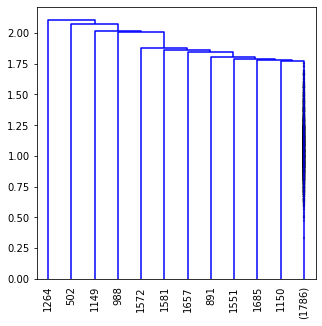

In [0]:
linked = linkage(df_scaled, 'single')
labelList = range(1, 10)
plt.figure(figsize=(5, 5))
dendrogram(linked,truncate_mode='lastp',orientation='top',p=12,leaf_font_size=10,show_contracted=True,leaf_rotation=90)
plt.show()